# Credit Card Approval Prediction

## Project Description

Commercial banks receive a lot of applications for credit cards. 

In this project, we will build an automatic credit card approval predictor using machine learning techniques.

The dataset used in this project is the Credit Card Approval dataset from the UCI Machine Learning Repository. t. Since this data is confidential, the contributor of the dataset has anonymized the feature names.

The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

Source: https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html




In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [60]:
file_path = "crx.data"
# above .data file is comma delimited
crx = pd.read_csv(file_path, delimiter=",", header = None)

## Exploring the data

In [31]:
crx.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [32]:
crx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [33]:
crx.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [61]:
crx.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [62]:
crx.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
               'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 
               'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']

In [63]:
irrelevant = ['DriversLicense', 'ZipCode']

In [64]:
crx = crx.drop(irrelevant, axis = 1)

In [65]:
numerical = ['Age', 'Debt', 'YearsEmployed','CreditScore','Income']

target = ['ApprovalStatus']
              
categorical = [x for x in crx.columns if x not in numerical + target]
categorical

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'Citizen']

In [66]:
crx = crx.replace('?', np.NaN)

In [67]:
crx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  Citizen         690 non-null    object 
 12  Income          690 non-null    int64  
 13  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


## Exploratory Data Analysis

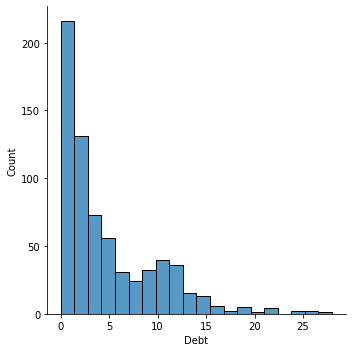

In [41]:
sns.displot(crx['Debt'])

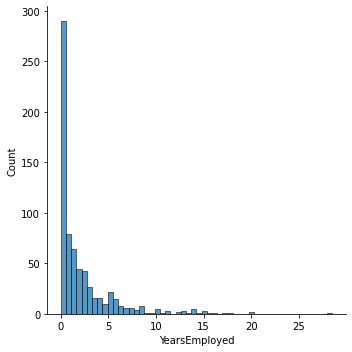

In [42]:
sns.displot(crx['YearsEmployed'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

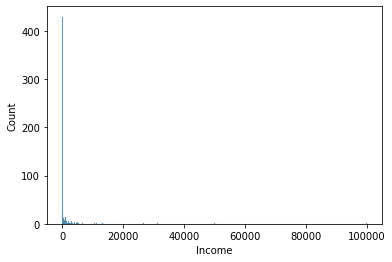

In [88]:
sns.histplot(crx['Income'])

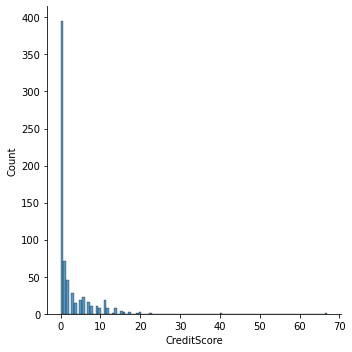

In [44]:
sns.displot(crx['CreditScore'])

## Splitting dataset into training and test

In [68]:
# Split into train and test sets
crx_train, crx_test = train_test_split(crx, test_size=0.33, random_state=42)

## Data Preprocessing

### Handling the missing values

In [69]:
# Fill in the missing values with mean imputation
crx_train.fillna(crx_train.mean(), inplace=True)
crx_test.fillna(crx_train.mean(), inplace=True)

# Count the number of NaNs in the datasets
print(crx_train.isnull().sum().sum())
print(crx_test.isnull().sum().sum())

39
15


/var/folders/c9/28ggq06x6v9b8vv3nfy2drz40000gp/T/ipykernel_9171/1317301442.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crx_train.fillna(crx_train.mean(), inplace=True)
/var/folders/c9/28ggq06x6v9b8vv3nfy2drz40000gp/T/ipykernel_9171/1317301442.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crx_test.fillna(crx_train.mean(), inplace=True)


In [47]:
crx_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 382 to 102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          454 non-null    object 
 1   Age             457 non-null    object 
 2   Debt            462 non-null    float64
 3   Married         456 non-null    object 
 4   BankCustomer    456 non-null    object 
 5   EducationLevel  455 non-null    object 
 6   Ethnicity       455 non-null    object 
 7   YearsEmployed   462 non-null    float64
 8   PriorDefault    462 non-null    object 
 9   Employed        462 non-null    object 
 10  CreditScore     462 non-null    int64  
 11  Citizen         462 non-null    object 
 12  Income          462 non-null    int64  
 13  ApprovalStatus  462 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 54.1+ KB


In [70]:
# There are null values in the object-type columns.
# Imputation : fill with the most frequent value
for col in crx_train:
    if crx_train[col].dtypes == 'object':        
        freq_train = crx_train[col].value_counts().index[0]       
        crx_train[col].fillna(freq_train, inplace = True)
        freq_test = crx_test[col].value_counts().index[0]       
        crx_test[col].fillna(freq_test, inplace = True)

In [71]:
crx_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 382 to 102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          462 non-null    object 
 1   Age             462 non-null    object 
 2   Debt            462 non-null    float64
 3   Married         462 non-null    object 
 4   BankCustomer    462 non-null    object 
 5   EducationLevel  462 non-null    object 
 6   Ethnicity       462 non-null    object 
 7   YearsEmployed   462 non-null    float64
 8   PriorDefault    462 non-null    object 
 9   Employed        462 non-null    object 
 10  CreditScore     462 non-null    int64  
 11  Citizen         462 non-null    object 
 12  Income          462 non-null    int64  
 13  ApprovalStatus  462 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 54.1+ KB


### Converting the non-numeric data into numeric

In [72]:
# Convert the categorical features in the train and test sets independently
crx_train = pd.get_dummies(crx_train)
crx_test = pd.get_dummies(crx_test)

# Reindex the columns of the test set aligning with the train set
crx_test = crx_test.reindex(columns=crx_train.columns, fill_value=0)

### Scaling

In [73]:
# Segregate features and labels into separate variables
X_train, y_train = crx_train.iloc[:, :-1].values, crx_train.iloc[:, [-1]].values
X_test, y_test = crx_test.iloc[:, :-1].values, crx_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## Modeling

In [78]:
# Instantiate the model with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train.ravel())

LogisticRegression()

## Model Evaluation

In [82]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  1.0
[[103   0]
 [  0 125]]


Our model is able to yield an accuracy score of 100%.